# **Polynomial Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
X = df.iloc[:, :3]
y = df.iloc[:, -1]

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Applying Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_predict = linreg_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.9080254616720277


# Applying Polynomial Regression model

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve



def poly(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

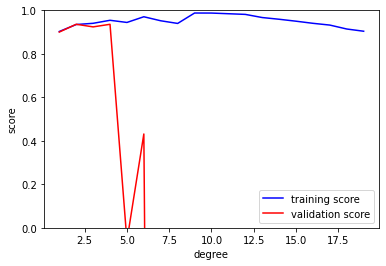

In [15]:
degree = np.arange(0, 20)
train_score, val_score = validation_curve(poly(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

# print(val_score)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [18]:
polyreg_model = poly(2)
polyreg_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [19]:
y_predict = polyreg_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.9552830276071673


## GridSearch CV

Seeing the graph and predicting which degree of polynomial to use is difficult so using gridsearch cv that automatically predicts the best degree of polynomial

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(poly(), param_grid, cv=7)

In [21]:
grid.fit(X, y);

In [22]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [23]:
# Here we can see that best degree of polynomial is 2 ('polynomialfeatures__degree': 2)

In [24]:
poly_grid_model = grid.best_estimator_
poly_grid_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [26]:
y_pred = poly_grid_model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.9552830276071713
